In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten 
from tensorflow.keras.models import Model
from keras.utils import to_categorical
import tensorflow.keras as k
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
y_actual = y_test

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# print(y_train.shape)
# print(x_train.shape)

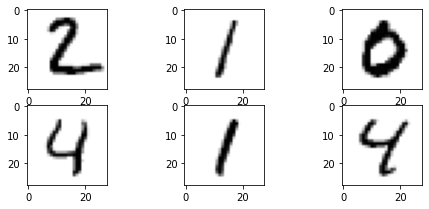

In [ ]:
plt.figure(figsize=(8, 5))
for i in range(1,7):
    ax = plt.subplot(3, 3, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
plt.show()

In [ ]:
#adding some noise
noise_factor = 0.5
pad = 5

PEAK = 3 #Simulate a low-light noisy image (if PEAK = 1, it will be really noisy)
x_train_noisy = np.random.poisson(x_train * PEAK) / PEAK * 255
x_test_noisy = np.random.poisson(x_test * PEAK) / PEAK * 255

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


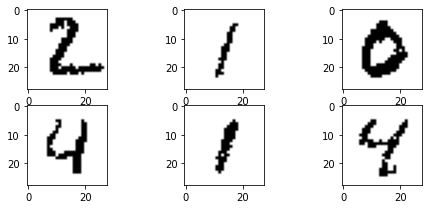

In [ ]:
#displaying images with noise
plt.figure(figsize=(8, 5))
for i in range(1,7):
    ax = plt.subplot(3, 3, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [ ]:
model = k.models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
          
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1,(3,3), activation='sigmoid', padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        1

In [ ]:
history = model.fit(x_train_noisy, y_train,
                    steps_per_epoch=1000,
                    epochs=10,
                    shuffle=True,
                    validation_data=(x_test_noisy, y_test),
                    validation_steps=20)

Epoch 1/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.5863 - accuracy: 0.4505 - val_loss: 0.4848 - val_accuracy: 0.8645
Epoch 2/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.3591 - accuracy: 0.8929 - val_loss: 0.2574 - val_accuracy: 0.9206
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.2345 - accuracy: 0.9294 - val_loss: 0.1909 - val_accuracy: 0.9408
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1753 - accuracy: 0.9473 - val_loss: 0.1366 - val_accuracy: 0.9600
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1431 - accuracy: 0.9574 - val_loss: 0.1169 - val_accuracy: 0.9637
Epoch 6/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1233 - accuracy: 0.9624 - val_loss: 0.0964 - val_accuracy: 0.9696
Epoch 7/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1103 - accuracy: 0.9664 - val_loss: 0.0956 -

In [ ]:
accuracy = model.evaluate(x_test_noisy, y_test)
accuracy

313/313 [==============================] - 1s 5ms/step - loss: 0.0705 - accuracy: 0.9767


[0.07051023840904236, 0.9767000079154968]

In [ ]:
# no_noise_img = model.predict(x_test_noisy)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


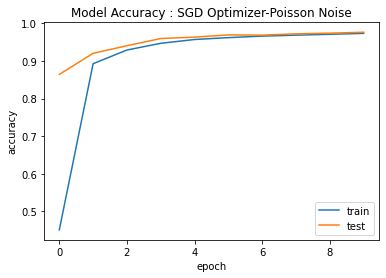

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy : SGD Optimizer-Poisson Noise')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

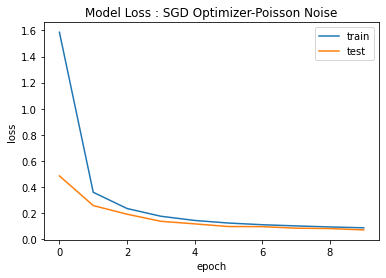

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss : SGD Optimizer-Poisson Noise')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
prediction = model.predict_classes(x_test_noisy)
prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
cm = confusion_matrix(y_actual, prediction)
cm

array([[ 962,    0,    4,    0,    0,    0,    7,    1,    4,    2],
       [   0, 1124,    2,    4,    0,    0,    2,    0,    3,    0],
       [   5,    1, 1010,    5,    1,    0,    0,    5,    5,    0],
       [   0,    0,    3,  990,    0,    6,    0,    3,    6,    2],
       [   0,    0,    2,    0,  955,    0,    6,    3,    1,   15],
       [   2,    0,    0,    8,    0,  875,    4,    1,    2,    0],
       [   3,    3,    1,    0,    3,    2,  944,    0,    2,    0],
       [   0,    5,    8,    3,    1,    2,    1,  993,    2,   13],
       [   3,    0,    7,    6,    1,    4,    4,    2,  938,    9],
       [   3,    4,    0,    7,    6,    4,    1,    4,    4,  976]])

In [ ]:
# import seaborn as sns
# plt.figure(figsize = (10,7))
# sns.heatmap(cm, annot=True)

In [ ]:
print("accuracy_score : ",accuracy_score(y_actual, prediction))

accuracy_score :  0.9767


In [ ]:
def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,  classes, rotation = 45)
    plt.yticks(tick_marks,  classes)
    
    if normalize:
        cm = c.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('ncm')
    else:
        print('cm')
    
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment = "center",
        color = "white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cm
[[ 962    0    4    0    0    0    7    1    4    2]
 [   0 1124    2    4    0    0    2    0    3    0]
 [   5    1 1010    5    1    0    0    5    5    0]
 [   0    0    3  990    0    6    0    3    6    2]
 [   0    0    2    0  955    0    6    3    1   15]
 [   2    0    0    8    0  875    4    1    2    0]
 [   3    3    1    0    3    2  944    0    2    0]
 [   0    5    8    3    1    2    1  993    2   13]
 [   3    0    7    6    1    4    4    2  938    9]
 [   3    4    0    7    6    4    1    4    4  976]]


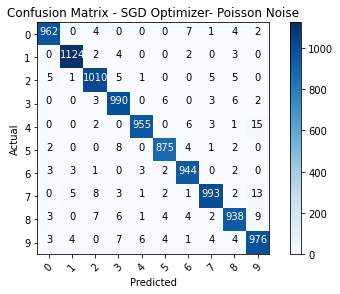

In [ ]:
%matplotlib inline
import itertools
cm_plot_labels = ['0', '1', '2','3', '4', '5','6','7', '8', '9']
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix - SGD Optimizer- Poisson Noise')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3', '4', '5','6','7', '8', '9']
print(classification_report(y_actual, prediction, target_names=target_names))    

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

